In [337]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [502]:
def preprocess():
    df = pd.read_csv(
        "./240524-o2arc3.0-arctrajectory/log.csv", parse_dates=["startedAt", "endedAt"]
    )
    # id,startedAt,endedAt,userId,taskId,actionSequence

    df_userrecord = pd.read_csv("./240524-o2arc3.0-arctrajectory/userRecord.csv")
    df_valid = pd.read_csv("./valid.csv", header=0, index_col=None)
    df[["Intentions",
                    "Intentions_Length",
                    "No_Miss",
                    "User_Tool",
                    "User_Task",
                    "Tool_Task",
                    "No_Miss_Length",
                    "User_Tool_Length",
                    "User_Task_Length",
                    "Tool_Task_Length"]]=None
    # id,userId,taskId,logId,trial,success,action,score,time
    df.drop(3093, inplace=True)
    df["dt"] = (df["endedAt"] - df["startedAt"]).apply(lambda x: x.total_seconds())
    df.drop(["endedAt", "startedAt"], axis=1, inplace=True)
    df = df.merge(df_userrecord, left_on="id", right_on="logId", how="inner")
    df["valid"] = False

    for j in range(len(df_valid)):
        i=df_valid.loc[j,'logId']
        df.loc[i, "valid"] = True
        df.loc[i, ["Intentions",
                    "Intentions_Length",
                    "No_Miss",
                    "User_Tool",
                    "User_Task",
                    "Tool_Task",
                    "No_Miss_Length",
                    "User_Tool_Length",
                    "User_Task_Length",
                    "Tool_Task_Length"]] = df_valid.loc[j, ["Intentions",
                    "Intentions_Length",
                    "No_Miss",
                    "User_Tool",
                    "User_Task",
                    "Tool_Task",
                    "No_Miss_Length",
                    "User_Tool_Length",
                    "User_Task_Length",
                    "Tool_Task_Length"]]
    df.drop(
        ["id_x", "id_y", "userId_y", "taskId_y", "time", "action"], axis=1, inplace=True
    )
    df.rename(columns={"userId_x": "userId", "taskId_x": "taskId"}, inplace=True)

    return df[df["valid"] == True]


log_df = preprocess()


def prob_df(task_id):
    return log_df[log_df["taskId"] == task_id]


mis_df = pd.read_csv("./misalignments.csv", header=0, index_col=0)
mis_df.iloc[:,8:16 ]/=100
r"""
Task_ID, Total_Traj,
entropy, nodesize, nodesize_unscaled, outdegree, outdegree_unscaled,
Total_Intentions, Total_Intention_Length, 
No_Miss_Rate, User_Tool_Rate, User_Task_Rate, Tool_Task_Rate,
No_Miss_Length_Rate, User_Tool_Length_Rate, User_Task_Length_Rate, Tool_Task_Length_Rate,
No_Miss, User_Tool, User_Task, Tool_Task, 
No_Miss_Length, User_Tool_Length, User_Task_Length, Tool_Task_Length
"""

'\nTask_ID, Total_Traj,\nentropy, nodesize, nodesize_unscaled, outdegree, outdegree_unscaled,\nTotal_Intentions, Total_Intention_Length, \nNo_Miss_Rate, User_Tool_Rate, User_Task_Rate, Tool_Task_Rate,\nNo_Miss_Length_Rate, User_Tool_Length_Rate, User_Task_Length_Rate, Tool_Task_Length_Rate,\nNo_Miss, User_Tool, User_Task, Tool_Task, \nNo_Miss_Length, User_Tool_Length, User_Task_Length, Tool_Task_Length\n'

In [868]:

sns.set_theme(style="white")
sns.color_palette("hls",8)

seq = ["No_Miss","User_Tool","Tool_Task","User_Task"]
realname = ["No Misalignment", "User Unfamiliarity", "Functional Inadequacy", "Cognitive Dissonance"]
#mis_dfo

In [340]:
log_df

,userId,taskId,actionSequence,Intentions,Intentions_Length,No_Miss,User_Tool,User_Task,Tool_Task,No_Miss_Length,User_Tool_Length,User_Task_Length,Tool_Task_Length,dt,logId,trial,success,score,valid
0,1,40,"[{""category"":""Selection"",""operation"":""SelectCe...",14,14,14,0,0,0,14,0,0,0,12.714,1,1,1,88377,True
1,1,40,"[{""category"":""Critical"",""operation"":""Submit"",""...",1,1,0,0,1,0,0,0,1,0,0.966,2,2,0,0,True
2,2,180,"[{""category"":""Critical"",""operation"":""ResizeGri...",10,55,9,0,1,0,9,0,46,0,118.864,3,1,0,0,True
3,4,32,"[{""category"":""Selection"",""operation"":""SelectCe...",18,31,14,1,0,3,14,3,0,14,69.919,4,1,1,48506,True
4,2,180,"[{""category"":""Critical"",""operation"":""ResizeGri...",18,103,13,2,0,3,13,59,0,31,231.463,5,2,1,8860,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10664,161,4,"[{""category"":""Selection"",""operation"":""SelectGr...",8,13,7,0,1,0,7,0,6,0,57.670,10668,3,0,0,True
10665,161,4,"[{""category"":""Selection"",""operation"":""SelectGr...",6,6,6,0,0,0,6,0,0,0,33.354,10669,4,1,72136,True
10666,161,3,"[{""category"":""Critical"",""operation"":""ResizeGri...",7,7,6,0,1,0,6,0,1,0,35.834,10670,1,0,0,True
10667,161,3,"[{""category"":""Critical"",""operation"":""ResizeGri...",13,14,12,0,1,0,12,0,2,0,59.467,10671,2,0,0,True


In [516]:
mis_df.mean()

Total_Traj                 24.190000
entropy                          inf
nodesize                    0.187595
nodesize_unscaled           3.511839
outdegree                   0.120271
outdegree_unscaled          2.219036
Total_Intentions          272.565000
Total_Intention_Length    500.925000
No_Miss_Rate                0.905100
User_Tool_Rate              0.022784
User_Task_Rate              0.025814
Tool_Task_Rate              0.046301
No_Miss_Length_Rate         0.588102
User_Tool_Length_Rate       0.103827
User_Task_Length_Rate       0.088933
Tool_Task_Length_Rate       0.219139
No_Miss                   248.330000
User_Tool                   6.290000
User_Task                   6.630000
Tool_Task                  11.315000
No_Miss_Length            248.330000
User_Tool_Length           56.600000
User_Task_Length           58.050000
Tool_Task_Length          137.945000
dtype: float64

In [712]:
pal = sns.color_palette("bright",10)
pal = pal.as_hex()
pal

['#023eff',
 '#ff7c00',
 '#1ac938',
 '#e8000b',
 '#8b2be2',
 '#9f4800',
 '#f14cc1',
 '#a3a3a3',
 '#ffc400',
 '#00d7ff']

(0.55, 1.0)

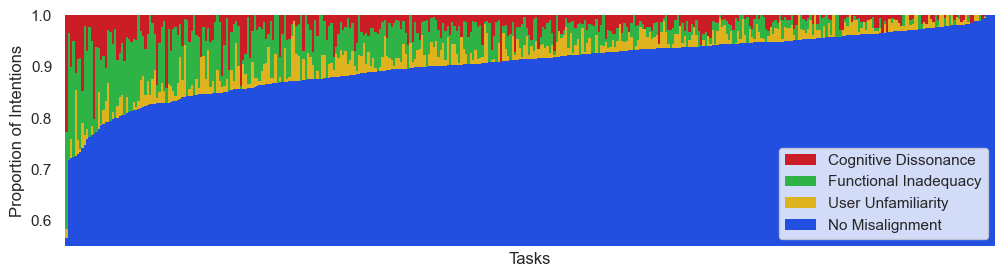

In [741]:
seq = ["No_Miss","User_Tool","Tool_Task","User_Task"]
realname = ["No Misalignment", "User Unfamiliarity", "Functional Inadequacy", "Cognitive Dissonance"]
# Blue, Orange,Green, Red

f, ax = plt.subplots(1, 1, figsize=(12,3))


order = [seq[i]+'_Rate' for i in range(4)]
mis_df["asdf"] = mis_df[order[0]]#3*mis_df[order[0]]+2*mis_df[order[1]]+1*mis_df[order[2]]
mis = mis_df.sort_values(by="asdf",ascending=True)
mis.reset_index(drop=True,inplace=True)

sns.barplot(y=mis[order[0]]+mis[order[1]]+mis[order[2]]+mis[order[3]], x=mis.index,ax=ax,linewidth=0,width=1, color=pal[3],label="Cognitive Dissonance")
sns.barplot(y=mis[order[0]]+mis[order[1]]+mis[order[2]], x=mis.index,ax=ax,linewidth=0,width=1,color=pal[2], label="Functional Inadequacy")
sns.barplot(y=mis[order[0]]+mis[order[1]], x=mis.index,ax=ax,linewidth=0,width=1,color=pal[8], label="User Unfamiliarity")
sns.barplot(y=mis[order[0]], x=mis.index,ax=ax,linewidth=0,width=1, color=pal[0],label="No Misalignment")
sns.despine(left=True, bottom=True)
ax.legend(loc='lower right')
ax.set_ylabel("Proportion of Intentions")
ax.set_xticks([])
ax.set_xlabel("Tasks")
ax.set_ylim(0.55,1)


(0.0, 1.0)

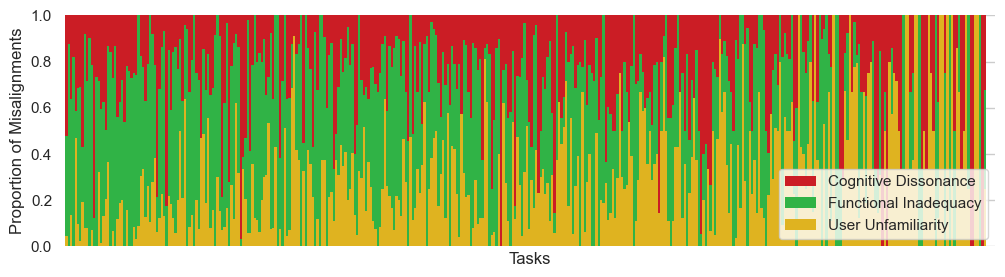

In [742]:
seq = ["No_Miss","User_Tool","Tool_Task","User_Task"]
realname = ["No Misalignment", "User Unfamiliarity", "Functional Inadequacy", "Cognitive Dissonance"]
# Blue, Orange,Green, Red

f, ax = plt.subplots(1, 1, figsize=(12,3))


order = [seq[i]+'_Rate' for i in range(4)]

mis_df["asdf"] = (mis_df[order[0]]/(mis_df[order[1]]+mis_df[order[2]]+mis_df[order[3]]))#3*mis_df[order[0]]+2*mis_df[order[1]]+1*mis_df[order[2]]
#mis_df["asdf2"] = (mis_df[order[2]]/(mis_df[order[1]]+mis_df[order[2]]+mis_df[order[3]]))
mis = mis_df.sort_values(by=["asdf"],ascending=True)
mis.reset_index(drop=True,inplace=True)
tot = mis[order[1]]+mis[order[2]]+mis[order[3]]
sns.barplot(y=(mis[order[1]]+mis[order[2]]+mis[order[3]])/tot, x=mis.index,ax=ax,linewidth=0,width=1, color=pal[3],label="Cognitive Dissonance")
sns.barplot(y=(mis[order[1]]+mis[order[2]])/tot, x=mis.index,ax=ax,linewidth=0,width=1,color=pal[2], label="Functional Inadequacy")
sns.barplot(y=(mis[order[1]])/tot, x=mis.index,ax=ax,linewidth=0,width=1,color=pal[8], label="User Unfamiliarity")

sns.despine(left=True, bottom=True)
ax.legend(loc='lower right')
ax.set_ylabel("Proportion of Misalignments")
ax.set_xlabel("Tasks")
ax.set_xticks([])
ax.set_ylim(0,1)


<Axes: xlabel='Total Trajectories', ylabel='Portion'>

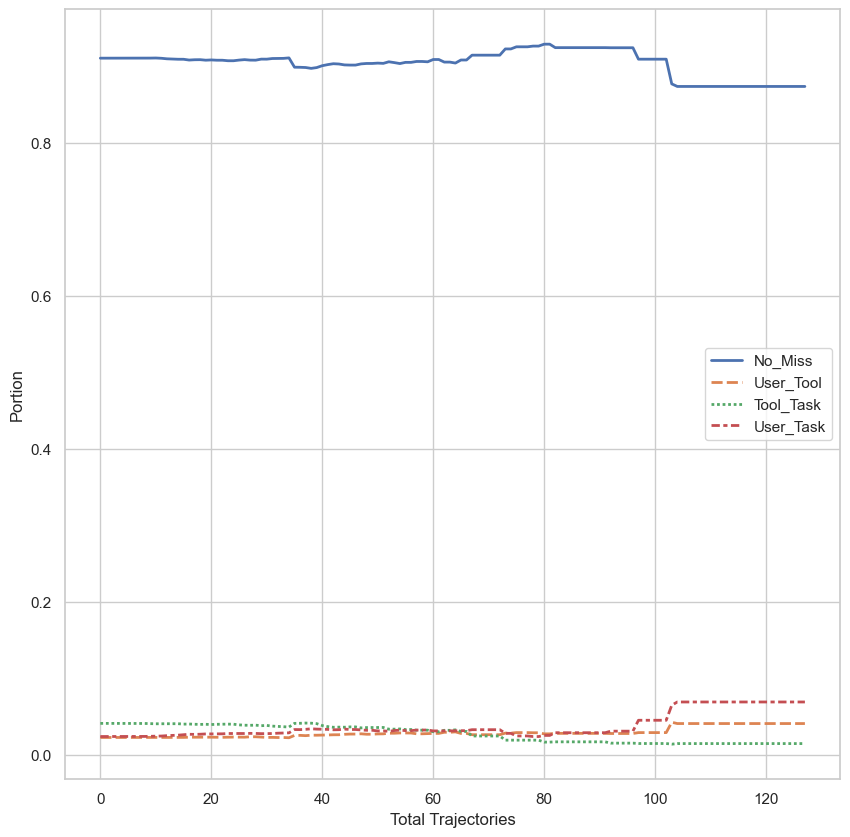

In [513]:
r = []
order = seq
for i in range(mis_df["Total_Traj"].max()):

    temp= mis_df[mis_df["Total_Traj"]>i].sort_values(order,ascending=False).reset_index(drop=True)
    sss = temp["Total_Intentions"].sum(axis=0)
    r.append(((temp[order].sum(axis=0)/sss).values))

ac = pd.DataFrame(r,columns=order)
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set(xlabel="Total Trajectories",ylabel="Portion")

sns.lineplot(data=ac,ax=ax,linewidth=2)

    

C:\Users\이호성\AppData\Local\Temp\ipykernel_22788\2089656511.py:14: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.kdeplot(data=a[realname[1:]],ax=ax,fill=False, legend=True, bw_adjust=0.25,common_norm=False, palette=pal[1:], linewidth=1)


<Axes: xlabel='Cognitive Dissonance', ylabel='Count'>

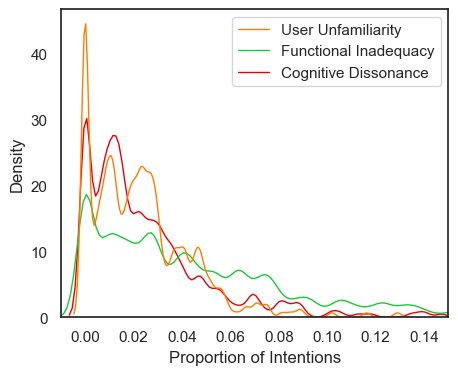

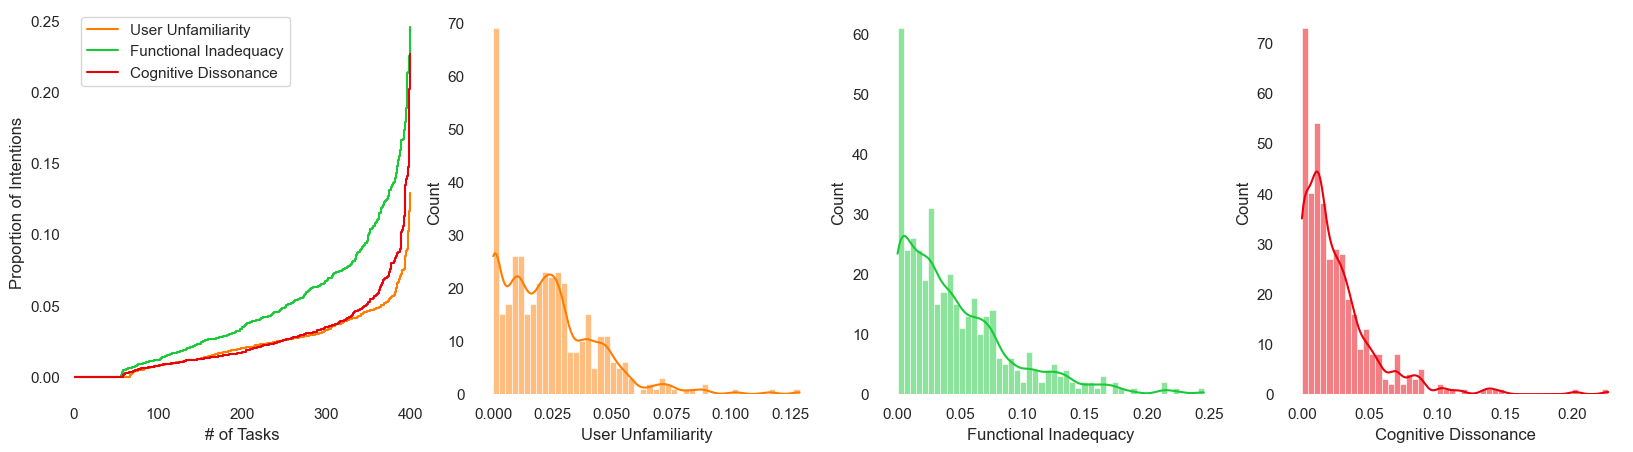

In [875]:
order = [seq[i]+'_Rate' for i in range(4)]
f, ax = plt.subplots(1, 1, figsize=(5,4))
figs , axes = plt.subplots(1, 4, figsize=(20,5))

a = mis_df[order]
a.columns = realname
for i in range(1,4):
    sns.ecdfplot(data=a,y=realname[i] ,ax=axes[0],legend=True, label=realname[i], stat="count", color=pal[i])
axes[0].set(ylabel="Proportion of Intentions",xlabel="# of Tasks")
axes[0].legend(loc='upper left')
sns.despine(left=True, bottom=True)

#sns.histplot(data=a[realname[1:]],ax=ax,fill=False, legend=True, element="step",kde=False,kde_kws={'bw_adjust':0.25, },stat="count", bins=50, common_norm=False)
sns.kdeplot(data=a[realname[1:]],ax=ax,fill=False, legend=True, bw_adjust=0.25,common_norm=False, palette=pal[1:], linewidth=1)

#ax.set(xlim=(0,0.25),xlabel="Proportion of Intentions", ylabel= '# of Tasks')
ax.set(xlim=(-0.01,0.15),xlabel="Proportion of Intentions", ylabel= 'Density')

sns.despine(left=True, bottom=True)

#sns.kdeplot(data=a[realname[1:]],ax=axes[1],fill=True)
#axes[1].set(xlim=(0,0.25),xlabel="Proportion of actions")

sns.histplot(data=a[realname[1]],ax=axes[1],fill=True, bins=50, kde=True, kde_kws={'bw_adjust':0.5}, color=pal[1])
sns.histplot(data=a[realname[2]],ax=axes[2],fill=True, bins=50, kde=True, kde_kws={'bw_adjust':0.5}, color=pal[2])
sns.histplot(data=a[realname[3]],ax=axes[3],fill=True, bins=50, kde=True, kde_kws={'bw_adjust':0.5}, color=pal[3])



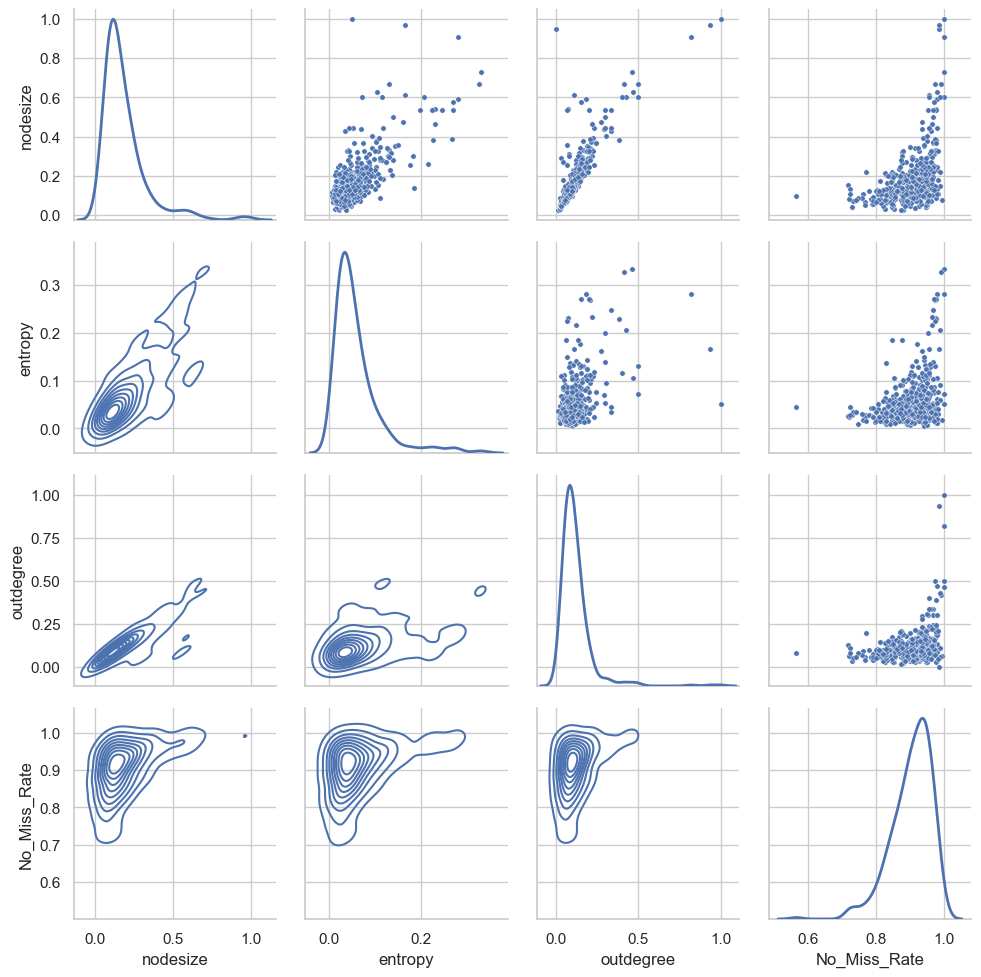

In [344]:
#entropy, nodesize, nodesize_unscaled, outdegree, outdegree_unscaled,


g = sns.PairGrid(mis_df[["nodesize","entropy", "outdegree", "No_Miss_Rate"] ], diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

In [413]:
%pip install matplotlib_venn

     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.3 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 40.3/40.3 kB 484.5 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45338 sha256=f665b0d131a77796930a70324103198ac75c3d1b47ebcadf8eaa18d636c787e7
  Stored in directory: c:\users\이호성\appdata\local\pip\cache\wheels\08\28\f0\0a3240d632a27df6da04d2888a6b058c37e1cbbb425ec5d2cc
Successfully built matplotlib_venn



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


A는 유저-툴에러만 있는거
B는 유저-태스크만 있는거 (즉 틀린거만 있는거)
C는 툴-태스크만 있는거

AB는 유저-툴에러, 유저-태스크가 동시에 반드시 있고 나머지는없음
BC는 유저-태스크, 툴-태스크만 있는거
AC는 유저-툴에러, 툴-태스크만 있는거

P는 다 맞은거

In [775]:
from matplotlib_venn import venn3, venn3_circles

Perfect:  35.24183546920215
UserTool + NoMiss:  10.396858205870194
UserTask + NoMiss:  18.065316246382803
ToolTask + NoMiss:  21.837536171971887
No ToolTask:  2.3253410500206697
No UserTool:  5.9011988424969
No UserTask:  5.115750310045473
EveryError:  1.1161637040099208
0.9888383629599008
35.24%
3410


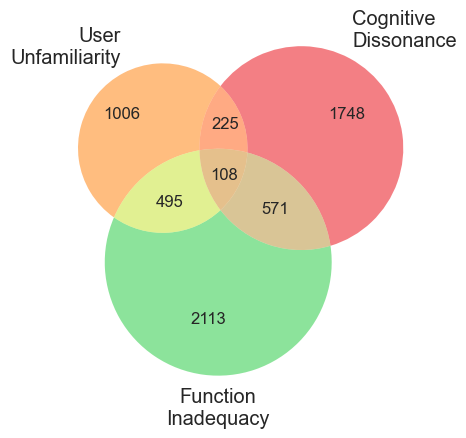

In [776]:
merged_df = log_df.merge(mis_df, left_on='taskId', right_index=True, how='inner')
merged_df
ll = merged_df.shape[0]

P = merged_df[(merged_df["No_Miss_x"] == merged_df["Intentions"])].shape[0]
A = merged_df[(merged_df["User_Task_x"] == 0) & (merged_df["Tool_Task_x"] == 0)].shape[0] - P
B = merged_df[(merged_df["User_Tool_x"] == 0) & (merged_df["Tool_Task_x"] == 0)].shape[0] - P
C = merged_df[(merged_df["User_Task_x"] == 0) & (merged_df["User_Tool_x"] == 0)].shape[0] - P

AB = merged_df[(merged_df["Tool_Task_x"] == 0)].shape[0] - A - B - P
BC = merged_df[(merged_df["User_Tool_x"] == 0)].shape[0] - B - C - P
AC = merged_df[(merged_df["User_Task_x"] == 0)].shape[0] - A - C - P



print('Perfect: ',P/ll*100)
print('UserTool + NoMiss: ',A/ll*100)
print('UserTask + NoMiss: ',B/ll*100)
print('ToolTask + NoMiss: ',C/ll*100)
print('No ToolTask: ',(AB)/ll*100)
print('No UserTool: ',(BC)/ll*100)
print('No UserTask: ',(AC)/ll*100)

print('EveryError: ',100-(P+A+B+C+AB+BC+AC)/ll*100)

print((P+A+B+C+AB+BC+AC)/ll)



fig ,ax= plt.subplots(1,1,figsize=(5,5))
vd = venn3(subsets = (A, B, AB, C, AC, BC, ll-(P+A+B+C+AB+BC+AC)), set_labels = ('User\nUnfamiliarity', 'Cognitive\nDissonance', 'Function\nInadequacy'), alpha=0.5, ax=ax, set_colors=(pal[1],  pal[3],pal[2])) #,subset_label_formatter=lambda x: f"{x/ll:.2%}")

print(f'{P/ll:.2%}')
print(P)



In [519]:
agg_df = log_df[['userId','taskId', 'Intentions_Length','No_Miss_Length','User_Tool_Length','User_Task_Length','Tool_Task_Length','success']]
sums = agg_df.sum()
sums[['No_Miss_Length','User_Tool_Length','User_Task_Length','Tool_Task_Length',]]/sums["Intentions_Length"]

No_Miss_Length      0.495743
User_Tool_Length    0.112991
User_Task_Length    0.115886
Tool_Task_Length    0.275381
dtype: object

<Axes: xlabel='idd', ylabel='power'>

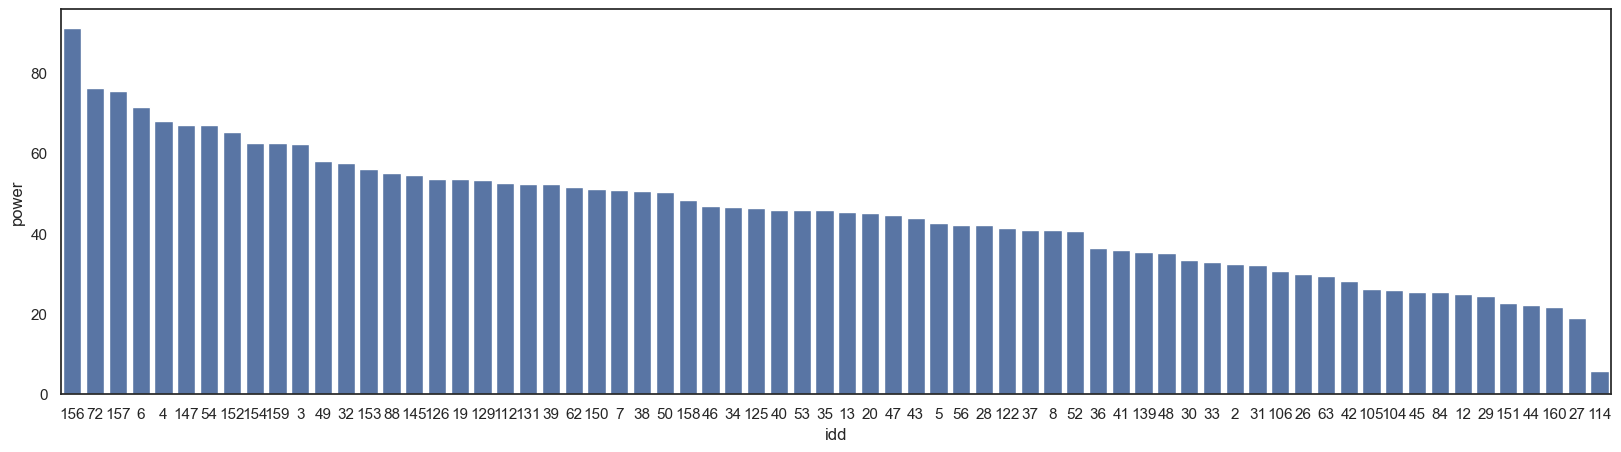

In [936]:
agg_df = log_df[['userId','taskId', 'Intentions_Length','No_Miss_Length','User_Tool','Tool_Task','success']].groupby("userId").sum()

agg_df["power"] = agg_df["No_Miss_Length"]/agg_df["Intentions_Length"] *100
agg_df = agg_df[agg_df["success"]>10]
agg_df['idd']=agg_df.index
agg_df = agg_df[["power","idd"]].sort_values(by="power",ascending=False).reset_index()
f, ax = plt.subplots(1, 1, figsize=(20, 5))
#barplot
sns.barplot(data=agg_df,x='idd',y="power",ax=ax,order=agg_df["idd"])

PearsonRResult(statistic=0.00019293870586690152, pvalue=0.9969307865413334)


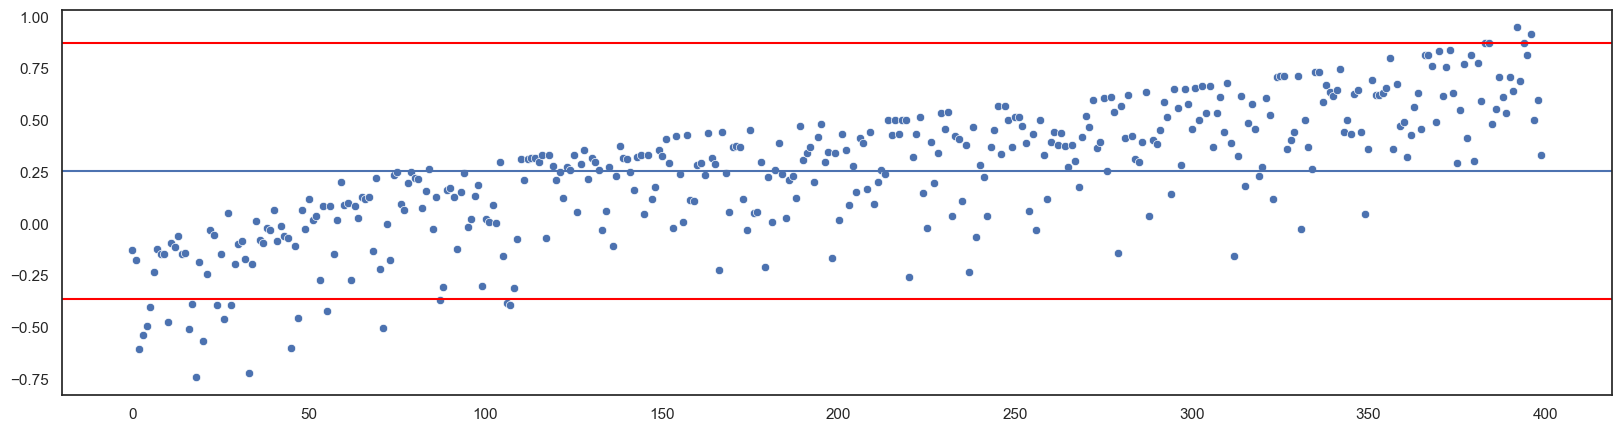

In [935]:
from scipy.stats import kendalltau, wilcoxon, kstest,spearmanr, pearsonr

harcdf= pd.read_csv("./h-arcdata/clean_summary_data.csv")
harcdf=harcdf[harcdf["task_type"]=="training"]
harcsum = harcdf.groupby("task_name").sum()[["solved","complete"]]
harcsum["succ_rate"]=harcsum["solved"]/harcsum["complete"]
#harcsum.sort_values(by="task_name",inplace=True,ascending=True)
harcsum["taskID"]=np.arange(1,1+len(harcsum))
harcsum= harcsum.sort_values(by="succ_rate",ascending=False)

ourlog = log_df[['taskId','success','valid']].groupby("taskId").sum()
ourlog["succ_rate"]=ourlog["success"]/ourlog["valid"]

#ourlog.sort_values(by="succ_rate",ascending=False,inplace=True)
plt.figure(figsize=(20,5))
sns.scatterplot(data=ourlog["succ_rate"].values-harcsum["succ_rate"].values)
mean = (ourlog["succ_rate"].values-harcsum["succ_rate"].values).mean()
plt.axhline(mean)
std = (ourlog["succ_rate"].values-harcsum["succ_rate"].values).std()
plt.axhline(mean+1.96*std, color='red')
plt.axhline(mean-1.96*std, color='red')
#wilcoxon(harcsum['rate'].values, ourlog['rate'].values)
#A =harcsum["taskID"].values
#A=ourlog.index.values
#B=harcsum["taskID"].values
B = mis_df[['No_Miss_Rate']].index.values #.sort_values('No_Miss_Rate',ascending=False,inplace=False).index.values

#print(kendalltau(A,B))
print(pearsonr(A,B))
#kstest(harcsum['rate'].values-ourlog['rate'].values, 'norm') # 정규성이 쓰레기
#wilcoxon(harcsum['rate'].values, ourlog['rate'].values)
# easy to hard
#wilcoxon()'
# merge df join mis_df and harcsum on taskID


#mis_df.merge(harcsum, left_on="Task_ID",right_on='taskID', how="inner").merge(ourlog, left_index=True,right_on='taskId', how="inner")[["No_Miss_Rate","User_Tool_Rate","Tool_Task_Rate","User_Task_Rate","succ_rate_x","succ_rate_y"]]

#g = sns.pairplot(mis_df.merge(harcsum, left_on="Task_ID",right_on='taskID', how="inner").merge(ourlog, left_index=True,right_on='taskId', how="inner")[["No_Miss_Rate","User_Tool_Rate","Tool_Task_Rate","User_Task_Rate","succ_rate_x","succ_rate_y"]],diag_kind='kde')
#g.map_upper(sns.kdeplot,color='red') 

#sns.jointplot(x=mis_df['No_Miss_Rate'], y=ourlog["succ_rate"], kind='scatter')

